
### **Neural Networks Made Simple | Backpropagation Explained From Scratch**

Hello so this notebook is inspired from Andre Karpathy just made simple and easy to understand if you guys prefer learning from reading. here's the link of his orignal video in which he explained neural network and the backpropgation from sratch.


https://www.youtube.com/watch?v=VMj-3S1tku0&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ

So andrej have built the micrograd which is an autograde engine that helps to do backpropogation on a scalor level. Basically micrograd just tells you about how backpropogation is done on neural networks which is the crux of deep learning. By backpropogation we train our neural networks, micrograd implements the backpropogation from scratch.


https://github.com/karpathy/micrograd

in engine.py, the backpropogation is implemented.
on top of it is nn.py, in which multilayer perceptron the bunch of neurons is built which gets trained by engine.py backpropogation.


So, in short, Andrej Karpathy built micrograd — a tiny 'autograd' engine. In simple terms, it's a tool that automatically does backpropagation, but it does it on individual numbers (scalars) instead of big matrices. This might seem limited, but that's exactly why it's perfect for learning.



In [ ]:
# Commented out IPython magic to ensure Python compatibility.
import math
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline

before starting we need to import python builtin libraries which will help us in writing code and perform operations with them.   

These libraries makes performing operation more efficient and easy instead if we just do everything by hand such as vectorization in numpy makes deep learning operation much more efficient and fast.

We perform operations on entire arrays (vectors, matrices, and tensors) at once, rather than using explicit Python for loops to process individual elements.

import math: Basic mathematical operations
In Neural Networks: Activation functions (sigmoid, tanh, ReLU) **bold text**


**import numpy as np:  is an open-source Python library used for scientific and numerical computing. It provides a high-performance multidimensional array object called an ndarray, along with a large collection of functions for efficient operations on these arrays. **

In Neural Networks: ALL matrix operations, data handling, fast computations

import matplotlib.pyplot as plt:
Create graphs and visualizations
In Neural Networks: Plot loss curves, see training progress, debug models


%matplotlib inline: Shows graphs directly below your code Graphs pop up in separate windows (annoying!) **bold text**


In [ ]:
def f(x):
  return 3*x**2 - 4*x + 5

So before moving forward in explaining bacpropogation we really wound want to know what a derivative is.

consider this function


In [ ]:
f(3.0)

20.0

which is giving us  a value of 20 at 3

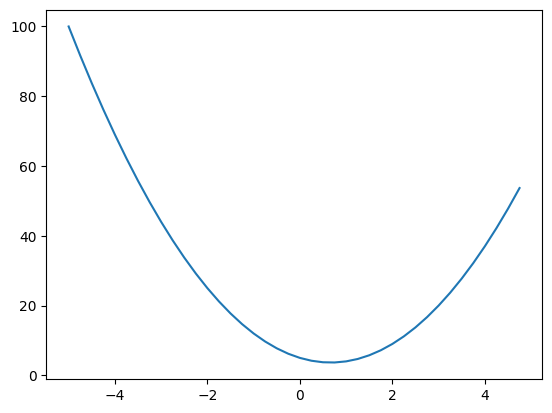

In [ ]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

let us initiate an array of library  numpy array bw -5 to 5 0.25 apart and let us plot it using plot method of matplotlyb library

Notice we're passing the ENTIRE array xs to our function f. NumPy is smart enough to apply 3*x**2 - 4*x + 5 to EVERY single value in the array at once. No loops needed! This is called vectorization, and it's why neural networks are fast


Now i would expect you to know abouot the derivative. To revise as we know that A derivative is a fundamental tool in calculus that measures the instantaneous rate of change of a function's output with respect to its input, representing the slope of the tangent line at any given point.

so we have a function which is giving us 20 at value of 3 as we know what will happen if we take a h which have a value of 0.001 and slightly nudge or increase x with a value of h. We expect the value of function should also increse if we increment the x by h.






In [ ]:
h = 0.000001
x = 3.0
f(x + h)

20.000014000003002

Now if  we notice rhe formula of the derivative which is

(f(x + h) - f(x)) / h

This is the formula if derivative which gives us the slope of the at any point of the function.

Means if we find slope of the above function.



In [ ]:
h = 0.000001
x = 3.0
(f(x + h) - f(x))/h

14.000003002223593

This means that At x = 3, for every tiny step forward, the function jumps up 14 times as much. That's the slope!

In [ ]:
# les get more complex
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


notice that d is giving us the value of 4 and its is the result f operations between three variables a, b and c.

In [ ]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
c += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

d1 4.0
d2 4.0001
slope 0.9999999999976694


look if we slightly increase a by the value of h by incrementing h in the value of c then we find the value of d which gets silghtly increased as expected. and we can find the slope by sybtracting d1 and d2 i hope you are getting it.


So, if we move to neural networks you will notice that neural networks are complex mathematical operations of nodes that are connected to each other and in the end after performing mathematical operatioon they give us a value which is used to then either classiy or in regression task. if you look below the single perceptron below:

it is just a mathematical operation.

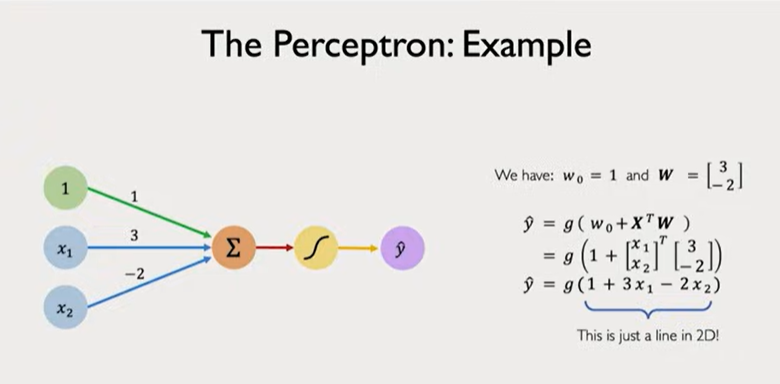



So neural network are just multiple layers of neurons or perceptrons. To say it simply they are mathematical operations happening in a sequence and layers which in the end does the job for us. So for these mathematical expressions we need some data sutructures. And this is what we are going to buil next.

In [ ]:
class Value:
  def __init__(self, data):
    self.data = data

  def __repr__(self):
    return f"Value(data={self.data})"

a = Value(2.0)
a

Value(data=2.0)

Here we have created a value object that just defines a constructor which initialize data. and then we have a repr dunction function which displays the data we have in the value object. Before we can do backpropagation, we need a special kind of number — a number that can eventually remember its gradient.

We're creating a new data type called Value. Think of it like Python's int or float, but smarter — it'll eventually know how it was created and what its gradient is

The constructor just stores a number. That's it for now. We're wrapping a regular number inside our Value box

def __repr__(self):
    return f"Value(data={self.data})"

This just makes it look nice when we print it. Without this, we'd see ugly memory addresses like <__main__.Value object at 0x7f8c1c0b4d90>

Now we create our first wrapped number. Instead of just 2.0, we get Value(data=2.0) — a number inside our custom box!

you will understand better when we will move ahead.


In [ ]:
# Notice that if we want to add two values here
class Value:
  def __init__(self, data):
    self.data = data

  def __repr__(self):
    return f"Value(data={self.data})"

a = Value(2.0)
b= Value(-3.0)
a+b

TypeError: unsupported operand type(s) for +: 'Value' and 'Value'

you wont be able to do that but to implement backpropogation we need to device a way that we shuold be able to perform the mathematical operations such a way.

In [ ]:
class Value:
  def __init__(self, data):
    self.data = data

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data)
    return out

a = Value(2.0)
b= Value(-3.0)
a+b


Value(data=-1.0)

The __add__ method is what makes our Value objects actually useful. Without __add__, Python has NO IDEA how to add our custom Value objects. It's like trying to add two chickens — makes no sense, right? We need to TEACH Python what 'adding' means for our Value class. You will get the better intuition by looking at the below picture
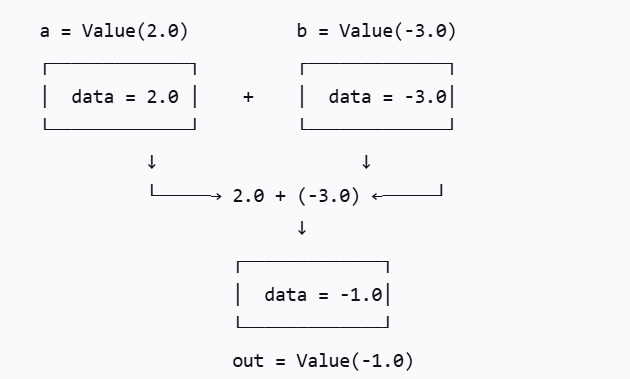

We take the numbers OUT of the boxes, add them, and put the result in a BRAND NEW box!

In [ ]:
# We can do the same thing for other operations
class Value:
  def __init__(self, data, _children=(), _op='', label= ''):
    self.data = data
    self._prev = set(_children)
    self._op = _op
    self.grad = 0.0
    self.label = label
  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+')
    return out
  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')
    return out


a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

Look at these two new additions! Every Value now remembers:

_prev : Its parents — the values that created it

_op : The operation that created it — like '➕' or '✖️'

When we add two Values, we now:

Create a new Value with the result (like before)

Record that this new Value's parents are self and other

Record that the operation was '+'

So c = a + b means: c knows 'I was made by adding a and b'!"

Look at what we've just built! Every mathematical operation now creates a tiny family record. When we do a + b*c, we're not just getting -28.0 — we're building a complete map of HOW we got -28.0.

And this map is exactly what backpropagation needs. It can start at the final answer and walk backwards through the _prev parents, asking 'how did you make me?' at every step.

This is AUTOMATIC DIFFERENTIATION! This is how PyTorch works! This is the SECRET SAUCE of deep learning!

Also notice the attributes label, and grade thesea are added for the following purpose.

grad = 0.0 : A place to store its gradient. This starts at zero and will be filled during backpropagation. It answers: 'How much does this value affect the final answer?'

label : A human-readable name! Instead of just calling everything 'Value', we can now name them 'a', 'b', 'c', 'L' — just like variables in math class




In [ ]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

"Before we dive into the code, let me tell you what it does. Remember how every Value now remembers its parents (_prev) and the operation (_op) that created it? This visualization code takes that family tree and DRAWS IT as a picture. It's like giving our neural network X-ray vision!"

def trace(root):
    nodes, edges = set(), set()
    
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
                
    build(root)
    return nodes, edges


trace is like a detective starting at the final answer and working backwards to find EVERYONE involved in the calculation.

Starting at d (final answer):
    
    d says: "My parents are a and temp!"
    → Write down d, draw arrows from a→d and temp→d
    
    temp says: "My parents are b and c!"
    → Write down temp, draw arrows from b→temp and c→temp
    
    a says: "I have no parents!"
    → Just write down a
    
    b says: "I have no parents!"
    → Just write down b
    
    c says: "I have no parents!"
    → Just write down c
    
Result: We have ALL nodes and ALL arrows!


def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})

This creates a blank canvas. rankdir='LR' means 'Left to Right'  our graph will flow from inputs on the left to output on the right.

    nodes, edges = trace(root)

First, we call our detective trace to get all the nodes and relationships

    for n in nodes:
        uid = str(id(n))
        dot.node(name=uid,
                 label="{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad),
                 shape='record')

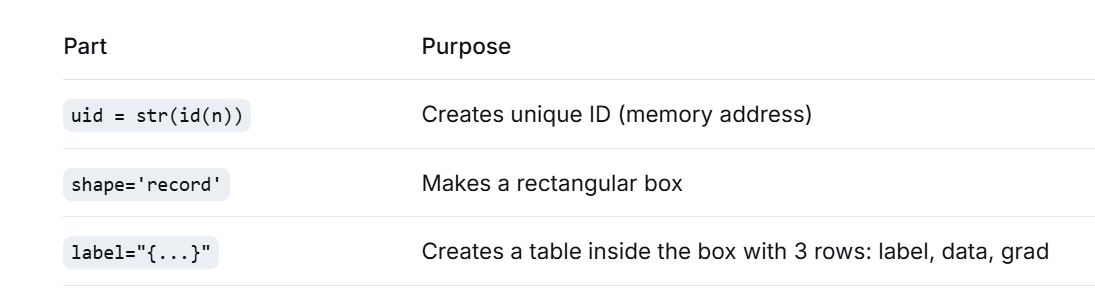

For every value, we draw a box showing its name, its current value, and its gradient. It's like a name tag with vital statistics.


        if n._op:
            dot.node(name=uid + n._op, label=n._op)
            dot.edge(uid + n._op, uid)


if this value was created by an operation, we draw a SMALL circle for that operation (+, , etc.) and connect it to the value box


    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)


Finally, we draw arrows from each parent to their child's operation node. This shows the flow of computation

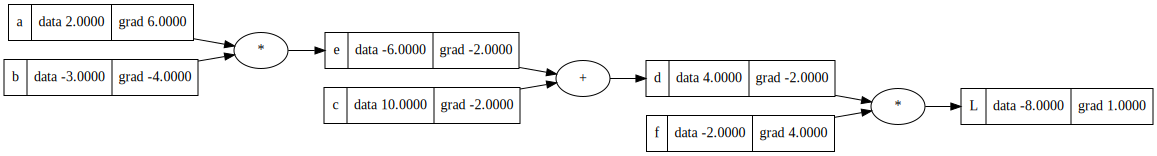

In [ ]:
draw_dot(L)

So to start backpropogation we have to fill in these gradients, and actually do backpropogation. So what is the derivative of l with respect to l, For example, if we change l with a tiny amount of h how much does l change. So lets create a function or that and experiment.

In [ ]:
def lol():
  h = 0.001
  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L1 = L.data

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  b.data += h
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L2 = L.data

  print((L2 - L1)/h)

  lol()


it's computing the gradient numerically, the 'brute force' way, so we can later check if our backpropagation is correct.

This is telling us: If we increase b by a tiny amount, L decreases by 4 times that amount. So the derivative of L with respect to b is -4.0

This is Numerical Differentiation exactly what we learned earlier.

(f(x + h) - f(x)) / h  # Exactly what we learned earlier!


When we implement backpropagation, we'll compute b.grad and it should equal -4.0 (or very close, accounting for floating point)

in backpropogqation we find derivatives backwards, and how they impact each other. So we can measure these gradients just as wed before and actually do backpropogation manually.

if i take this expression
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L
and change it and see backpropogation through it

In [ ]:
def lol():
  # Add a small amount h
   h = 0.001
   a = Value(2.0, label='a')
   b = Value(-3.0, label='b')
   c = Value(10.0, label='c')
   e = a*b; e.label = 'e'
   d = e + c; d.label = 'd'
   f = Value(-2.0, label='f')
   L = d * f; L.label = 'L'
   L1 = L.data
#this would be measuring the derivatove of L with respect to a
   a = Value(2.0 + h, label='a')
   b = Value(-3.0, label='b')
   c = Value(10.0, label='c')
   e = a*b; e.label = 'e'
   d = e + c; d.label = 'd'
   f = Value(-2.0, label='f')
   L = d * f; L.label = 'L'
   L2 = L.data
   print((L2-L1)/h)


lol()

6.000000000000227


In [ ]:
def lol():
  # Add a small amount h
   h = 0.001
   a = Value(2.0, label='a')
   b = Value(-3.0, label='b')
   c = Value(10.0, label='c')
   e = a*b; e.label = 'e'
   d = e + c; d.label = 'd'
   f = Value(-2.0, label='f')
   L = d * f; L.label = 'L'
   L1 = L.data
#this would be measuring the derivatove of L with respect to a
   a = Value(2.0, label='a')
   b = Value(-3.0, label='b')
   c = Value(10.0, label='c')
   e = a*b; e.label = 'e'
   d = e + c; d.label = 'd'
   f = Value(-2.0, label='f')
   L = d * f; L.label = 'L'
   # if we change L by h the result will be different
   L2 = L.data + h

   print((L2-L1)/h)


lol()

1.000000000000334


In [ ]:
# if we manually set l.grad 1

L.grad = 1.0

So we will continue doing backpropogation manually

as we did l we can move back to d and f

as l depends on d anf f l = d*f we need to finf what is dl/dd and dl/df

so waht if if say that dl/dd -> f

i can prove it

(f(x+h)-f(X))/h

we have l is d times f, increasing d by h it becomes

((d+h)*f-d*f)/h if we expand it
(d*f+h*f-d*f)/h


after cancelling out the things
(h*f)h
f

so we proved it



In [ ]:
# lets set the valules we computed manually
f.grad = 4.0
d.grad = -2.0

In [ ]:
#we can manually double check also
def lol():
  h = 0.001
  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L1 = L.data

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  b.data += h
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0 +h , label='f')
  L = d * f; L.label = 'L'
  L2 = L.data

  print((L2 - L1)/h)

  lol()



if we move backwards and compute gradients of l to c
dd / dc ? 1.0

d = c+e
(f(x+h)-f(x))/h
((c + h +e) - c+e)/ h
after cacelling out the stuff we get

h/h which is
1.0

we have proved that
dd/dc = 1.0 and
dd / de = 1.0 as well


ok we just know that c and e combine to give d by plus operator and then d and f combine to give l but wie want to compute the derivative of c and e with respect to L. In a massive neural network these derivates are computed with the help of chain rule.

YOu can intuitively imagine chain rule As put by George F. Simmons: "If a car travels twice as fast as a bicycle and the bicycle is four times as fast as a walking man, then the car travels 2 × 4 = 8 times as fast as the man."


so the chain rule tells us that

dL/dc = (dl/dd)*(dd/dc)

so we have c. grad equal to the multiplication of (dl/dd)*(dd/dc) which we computed earllier.


In [ ]:
c.grad = -2.0
e.grad = -2.0

In [ ]:
def lol():
  # Add a small amount h
  #we can manually check also
   h = 0.001
   a = Value(2.0, label='a')
   b = Value(-3.0, label='b')
   c = Value(10.0, label='c')
   e = a*b; e.label = 'e'
   d = e + c; d.label = 'd'
   f = Value(-2.0, label='f')
   L = d * f; L.label = 'L'
   L1 = L.data
#this would be measuring the derivatove of L with respect to a
   a = Value(2.0, label='a')
   b = Value(-3.0, label='b')
   c = Value(10.0 , label='c')
   e = a*b; e.label = 'e'
   e.data+=h
   d = e + c; d.label = 'd'
   f = Value(-2.0, label='f')
   L = d * f; L.label = 'L'
   # if we change L by h the result will be different
   L2 = L.data

   print((L2-L1)/h)


lol()

-2.000000000000668


In [ ]:
# similarly we compute a grad and b grad
a.grad = -2.0 *-3.0
b.grad = -2.0* 2.0

In [ ]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a * b
d = e + c
L = d * f

print(L.data)

# The explanation of this code is below

-5.900192000000001


After we computed all gradients (from L back to a, b, c, f), we now use them to IMPROVE our network. This is called gradient descent — and it's how every neural network learns

We're taking each value and nudging it a tiny bit in the direction that reduces our loss L

0.01 is our learning rate. It's like taking a small step instead of a giant leap. If we changed values by the full gradient, we might overshoot the minimum

The gradient tells us which direction INCREASES L. But we want to DECREASE L. So we move opposite to the gradient


After updating all values, we run the forward pass again. The new L should be SMALLER than before!



So we are moving forward to actual neural netowork and backpropogation there. Every neural network is made of thousands of这些小 building blocks called neurons. Each neuron does one simple thing:

Take inputs (like x1, x2)

Multiply them by weights (w1, w2 — how important each input is)

Add them all up

Add a bias (b — how easily this neuron wakes up)

(Later) Pass through an activation function


x1 = Value(2.0, label='x1')    # First input feature
x2 = Value(0.0, label='x2')    # Second input feature

These are like the signals coming into a real neuron — maybe from other neurons or from data like pixel values, sensor readings, etc

w1 = Value(-3.0, label='w1')   # Weight for first input
w2 = Value(1.0, label='w2')    # Weight for second input

Weights are like the strength of connections in a brain. Some inputs matter more (larger weights), some less. Negative weights mean 'inhibit' or 'oppose

b = Value(6.8813735870195432, label='b')


Bias is like the neuron's base excitement level. Even with zero inputs, the neuron can still fire if bias is high enough. This weird number is special — it's asinh(3) which will make our activation nice later

x1w1 = x1 * w1          # 2.0 * -3.0 = -6.0
x1w1.label = 'x1*w1'

x2w2 = x2 * w2          # 0.0 * 1.0 = 0.0
x2w2.label = 'x2*w2'

First, each input gets multiplied by its weight. It's like saying: 'This input, with this importance, contributes this much

x1w1x2w2 = x1w1 + x2w2   # -6.0 + 0.0 = -6.0
x1w1x2w2.label = 'x1*w1 + x2*w2'Now we add up all the weighted inputs. This is the total signal coming into the neuron.

n = x1w1x2w2 + b         # -6.0 + 6.881373587... = 0.881373587...
n.label = 'n'

Finally, we add the bias. Think of this as: even with -6.0 total input, the bias of 6.88 wakes the neuron up to 0.88.

Our neuron's raw output is about 0.881. This number will then go through an activation function (like tanh) to squash it between -1 and 1, making it behave more like a real neuron (firing or not firing).

In [ ]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'

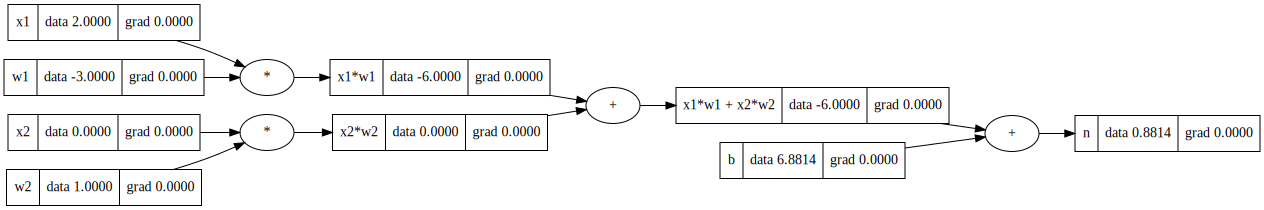

In [ ]:
draw_dot(n)

then our function goes to the activation function which we can use accoridng to your need, the famous ones are sigmoid tanh, relu leaky relu. however we will implemetn tanh.So to implemetnt tanh we first have to understand the tanh
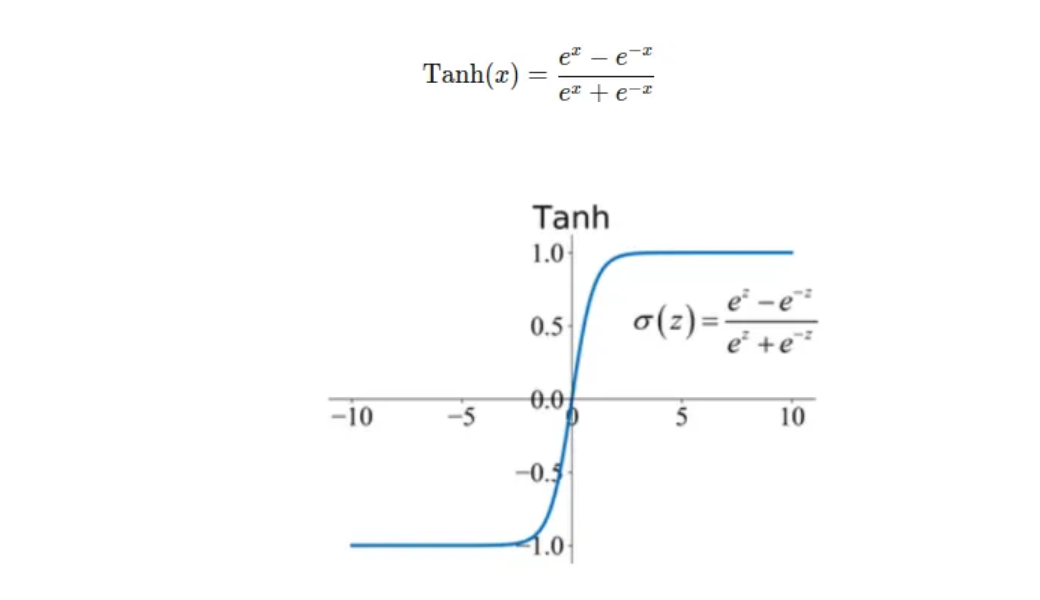

Tanh (hyperbolic tangent) is a type of activation function that transforms its input into a value between -1 and 1.

So we are going to impplement tanh.




In [ ]:
# We can do the same thing for other operations
class Value:
  def __init__(self, data, _children=(), _op='', label= ''):
    self.data = data
    self._prev = set(_children)
    self._op = _op
    self.grad = 0.0
    self.label = label
  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+')
    return out
  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')
    return out
  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')
    return out

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

In [ ]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

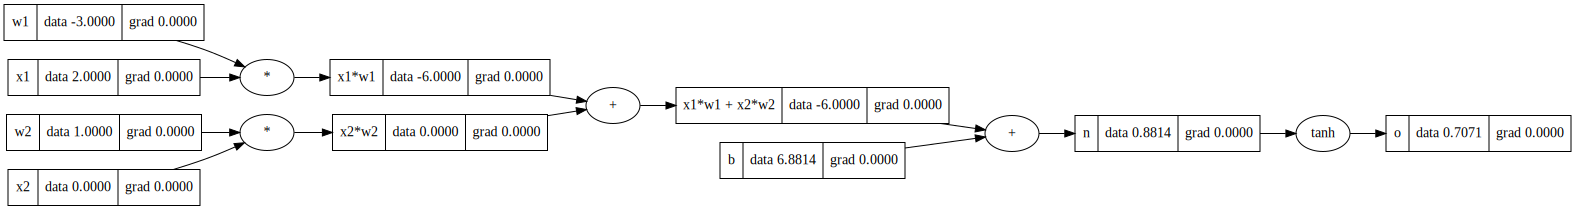

In [ ]:
draw_dot(o)

See that the output goes to tanh before final classification or regression output. if we know the derivative of tanh we would be able to backpropogate. So what is the derivative of O with respect to inputs of the neuron and then after finding the derivatives we can backpropogate and adjust our weights and learning rate, implemetning gradient descent also for a better output. at the base case what is the derivative of O with respect to O. as we know this is the base case, which is always 1.

In [ ]:
o.grad = 1.0

So if we move back to derivative of n with respect to 0.

As we know do/dn = i-tanh(n)**2 we can also write it as

do/dn = i-o**2
so we can calculate it in next step

In [ ]:
1-0-o.data**2

0.4999999999999999

In [ ]:
n.grad = 0.5

we have already learnt in the previouse that plus operator simply distribite the gradients to both nodes. and we can fin the gradient by sim[ly multiplying it with previouse gradient as in the chain rule so we can similarly set previouse gradients as well.

In [ ]:
x1w1x2w2.grad = 0.5
b.grad = 0.5

In [ ]:
x1w1.grad=0.5
x2w2.grad = 0.5

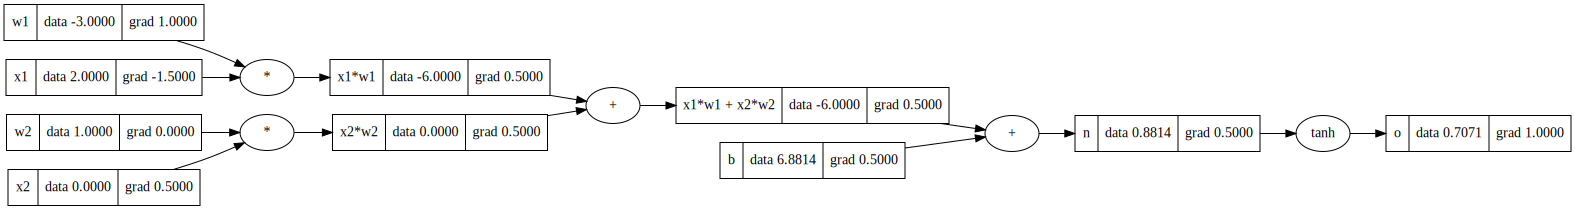

In [ ]:
draw_dot(o)

In [ ]:
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

In [ ]:
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

so instead of doing manual backprpogation, we can implement it in a function that will automatically do the things for us.

In [ ]:
class Value:

  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+')

    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward

    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')

    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward

    return out

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')

    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward

    return out

  def backward(self):

    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad = 1.0
    for node in reversed(topo):
      node._backward()


a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

Look at this new _backward! It's a function that knows how to pass gradients backwards through this specific operation. By default, it does nothing (lambda: None) — because leaf nodes have no operations to backprop through.

When we add two values, the derivative with respect to both inputs is 1. So if the final loss gradient at out is out.grad, then::
self gets that same gradient

other gets that same gradient"

Example: If c = a + b and c.grad = 5, then:

a.grad += 5 (because ∂c/∂a = 1)

b.grad += 5 (because ∂c/∂b = 1)

Multiplication is trickier! The derivative depends on the OTHER value:

To find how out changes with self, we multiply by other.data

To find how out changes with other, we multiply by self.data"

Example: If c = a * b, a.data = 2, b.data = 3, and c.grad = 5:

a.grad += 3 * 5 = 15 (because ∂c/∂a = b = 3)

b.grad += 2 * 5 = 10 (because ∂c/∂b = a = 2)

Tanh squashes values between -1 and 1, like a neuron firing or not firing. Its derivative is 1 - tanh² — beautiful and simple

In [ ]:
topo = []
visited = set()
def build_topo(v):
  if v not in visited:
    visited.add(v)
    for child in v._prev:
      build_topo(child)
    topo.append(v)
build_topo(o)
topo

[Value(data=2.0),
 Value(data=-3.0),
 Value(data=-6.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=0.0),
 Value(data=-6.0),
 Value(data=6.881373587019543),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

In [ ]:
b._backward()

In [ ]:
o._backward()

In [ ]:
n._backward()